In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Exploratory Data Analysis (EDA)

In [4]:
#read the dataset using pandas
df = pd.read_csv('/content/drive/MyDrive/water_potability.csv')
df = df.sample(frac =1 ,random_state=42)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2947,NaN,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,0
2782,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,1
1644,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,0
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,0
2045,6.615350,179.240661,26392.863612,9.309160,NaN,496.363562,12.786595,78.262369,4.453443,1
...,...,...,...,...,...,...,...,...,...,...
1095,4.187491,208.374188,21809.709834,5.846112,327.474203,264.508083,11.235144,46.682597,4.592959,1
1130,7.793915,164.958947,25506.912237,7.868036,358.259200,398.460312,15.297496,NaN,4.220028,1
1294,6.630364,186.761088,30939.023214,7.703481,NaN,330.876083,13.815757,86.753117,3.490588,0
860,8.783168,218.032840,16183.586649,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137,0


In [5]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
df.shape

(3276, 10)

In [7]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [8]:
df.info

<bound method DataFrame.info of             ph    Hardness        Solids  Chloramines     Sulfate  \
2947       NaN  183.521107  20461.252710     7.333212  333.119476   
2782  6.643159  188.913541  32873.820022     6.791509  333.848842   
1644  7.846058  224.058877  23264.109968     5.922367  300.402620   
70    7.160467  183.089310   6743.346066     3.803036  277.599099   
2045  6.615350  179.240661  26392.863612     9.309160         NaN   
...        ...         ...           ...          ...         ...   
1095  4.187491  208.374188  21809.709834     5.846112  327.474203   
1130  7.793915  164.958947  25506.912237     7.868036  358.259200   
1294  6.630364  186.761088  30939.023214     7.703481         NaN   
860   8.783168  218.032840  16183.586649     7.390474  334.053885   
3174  6.698154  198.286268  34675.862845     6.263602  360.232834   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2947    356.369022       20.179029        67.019903   4.886634

Check data distribution each feature

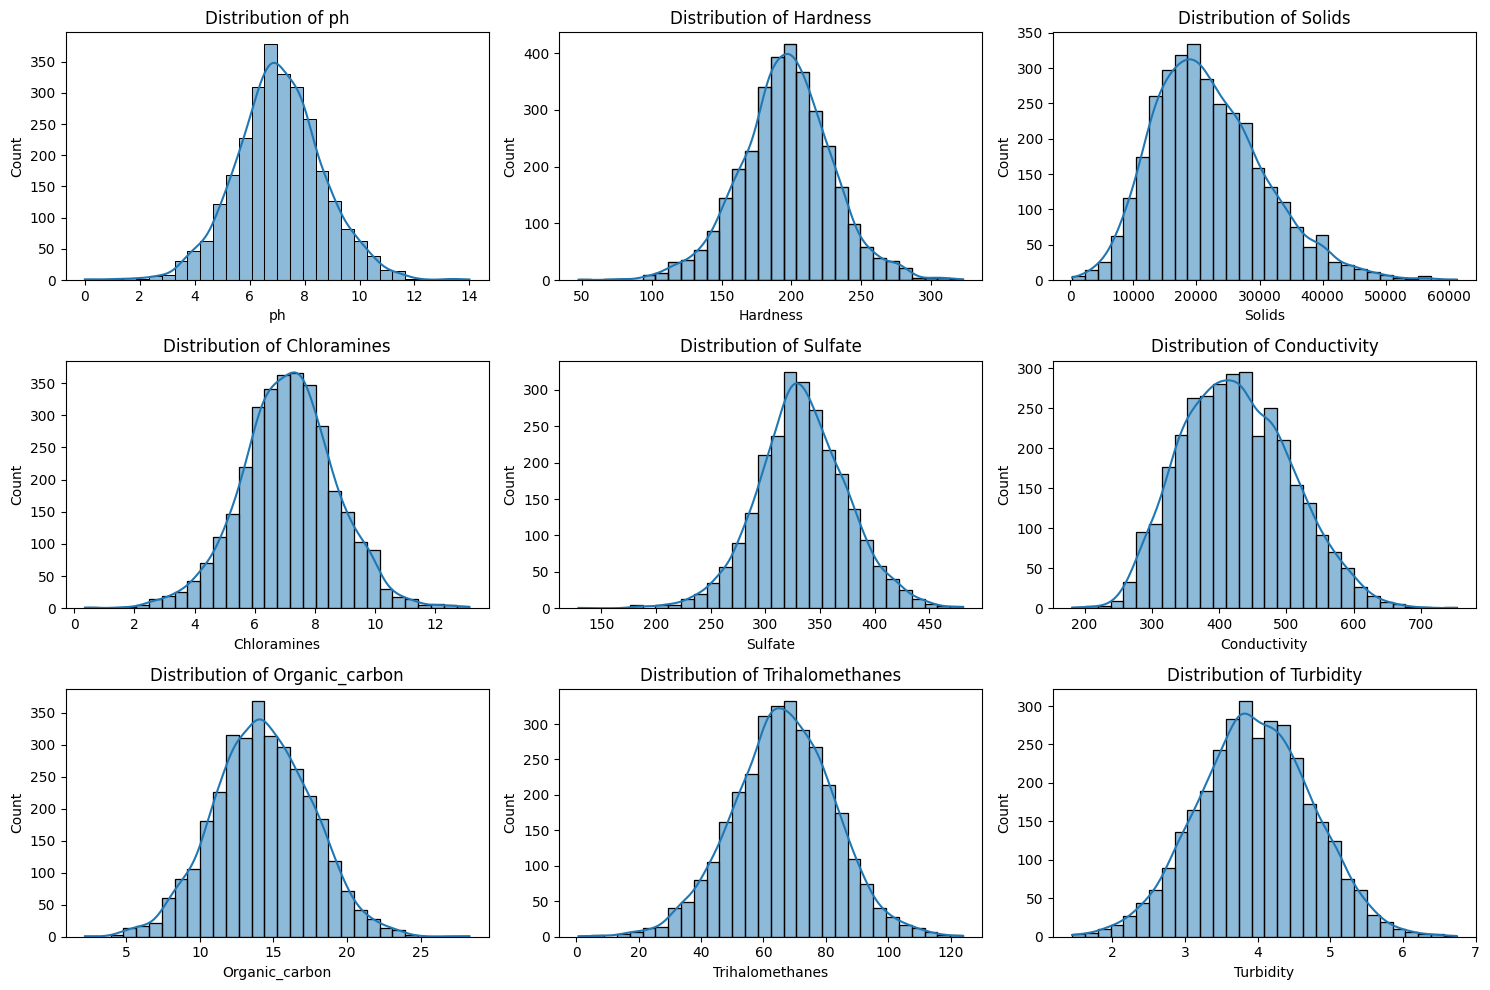

In [9]:
# Plotting the distribution of each feature
features = df.columns[:-1]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

###Handling missing values

In [10]:
df.isnull().sum().sort_values()

Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
Trihalomethanes    162
ph                 491
Sulfate            781
dtype: int64

In [11]:
df.duplicated().sum()

0

Apply simple impution to replace missing value with mean

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Trihalomethanes'] = imputer.fit_transform(df[['Trihalomethanes']])
df['ph'] = imputer.fit_transform(df[['ph']])
df['Sulfate'] = imputer.fit_transform(df[['Sulfate']])

In [13]:
df.isnull().sum().sort_values()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

###Handling Outliers

In [14]:
df_cleaned = df

In [15]:
df_cleaned.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


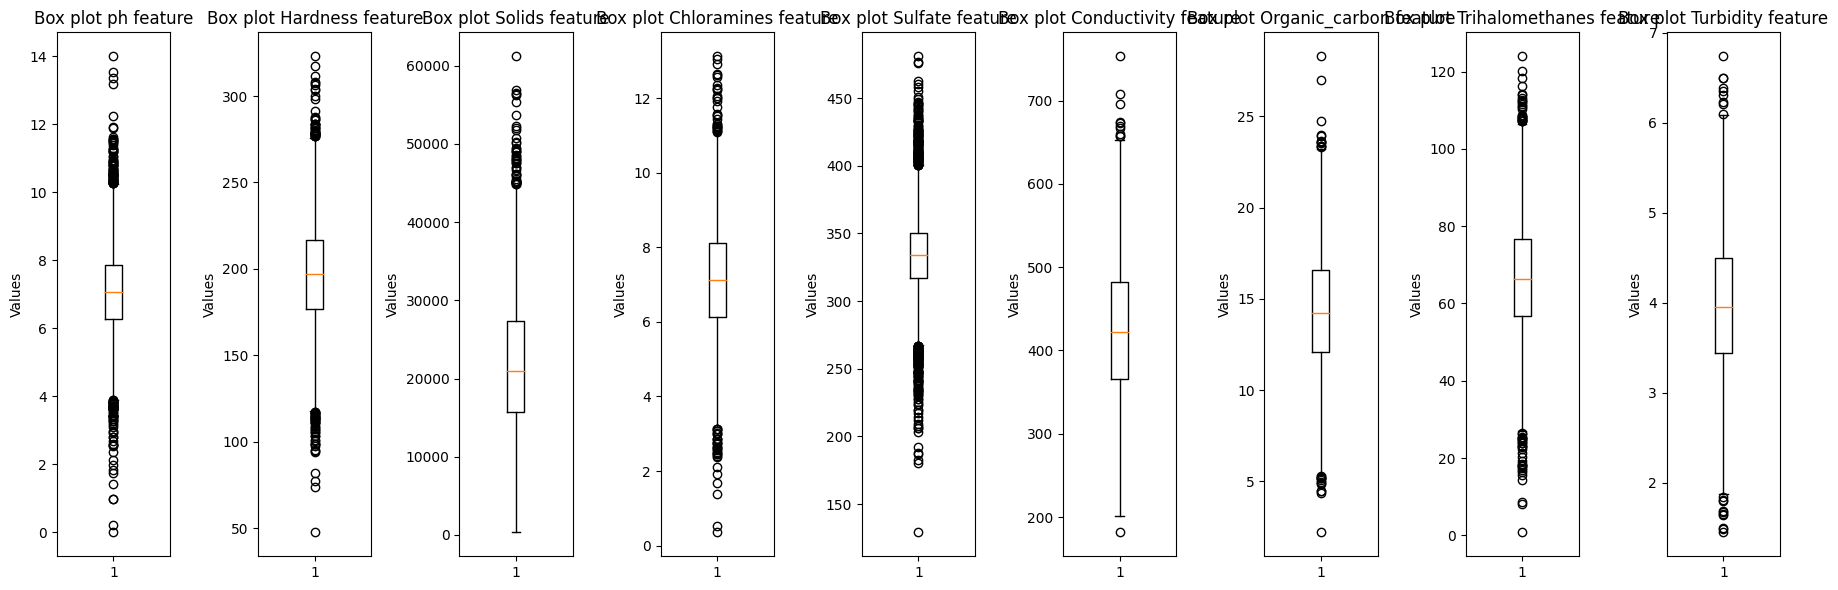

In [16]:
#boxplot to see outliers
features = ['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate','Conductivity', 'Organic_carbon','Trihalomethanes','Turbidity']
fig, axes = plt.subplots(1, len(features), figsize=(18,6))

for ax, feature in zip(axes, features):
    ax.boxplot(df_cleaned[feature])
    ax.set_title(f'Box plot {feature} feature')
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()

In [17]:
#Apply IQR and drop outliers
outliers_indices = []

for feature in features:
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1

    outliers_rows = df_cleaned[(df_cleaned[feature] < (Q1 - 1.5 * IQR)) | (df_cleaned[feature] > (Q3 + 1.5 * IQR))].index
    outliers_indices.extend(outliers_rows)

df_cleaned = df_cleaned.drop(set(outliers_indices), axis=0)


#ทำไมถึงดรอปทิ้ง?

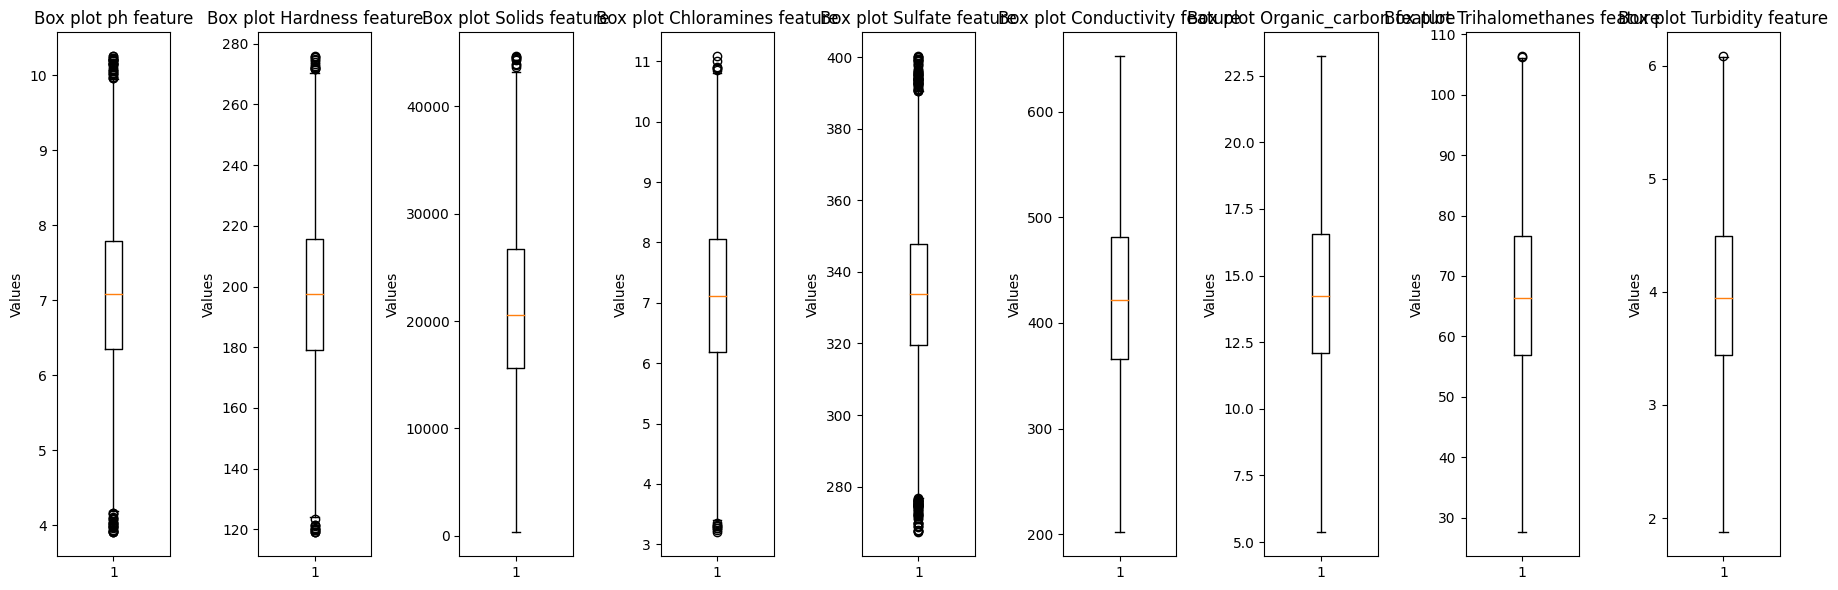

In [18]:
#boxplot to see outliers
fig, axes = plt.subplots(1, len(features), figsize=(18,6))

for ax, feature in zip(axes, features):
    ax.boxplot(df_cleaned[feature])
    ax.set_title(f'Box plot {feature} feature')
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()

In [19]:
df_cleaned.shape

(2666, 10)

In [20]:
#data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned[features] = scaler.fit_transform(df_cleaned[features])

<Axes: title={'center': 'Target Class Distribution'}, xlabel='Potability', ylabel='count'>

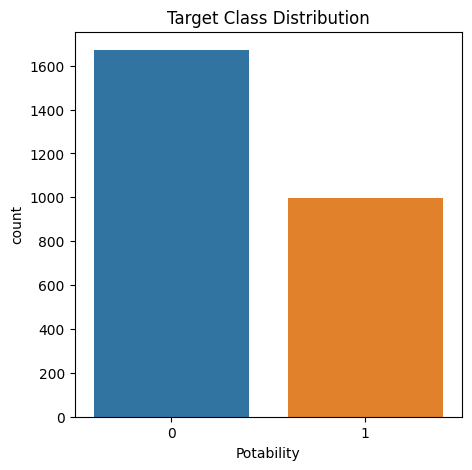

In [21]:
#checking target value balance
plt.figure(figsize = (5,5))
plt.title('Target Class Distribution')
sns.countplot(data= df_cleaned, x = df_cleaned['Potability'])

###handle target class imbalance

In [22]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('Potability', axis=1)
y = df_cleaned['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
from imblearn.over_sampling import RandomOverSampler


oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

<Axes: title={'center': 'Target Class Distribution'}, xlabel='Potability', ylabel='count'>

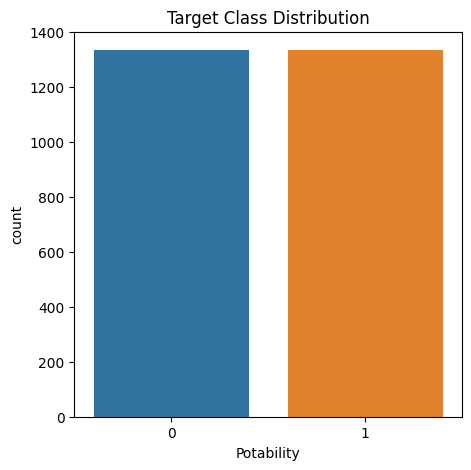

In [28]:
#checking target value balance after resampling
plt.figure(figsize = (5,5))
plt.title('Target Class Distribution')
sns.countplot(data= df_cleaned, x = y_train_resampled)

#Modeling

In [29]:
#with normal train set
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and testing sets
X = df_cleaned.drop('Potability', axis=1)
y = df_cleaned['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training various classification models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

results

{'Random Forest': 0.651685393258427,
 'KNN': 0.6329588014981273,
 'Logistic Regression': 0.6292134831460674}

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Training various classification models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

results

{'Random Forest': 0.6423220973782772,
 'KNN': 0.5898876404494382,
 'Logistic Regression': 0.5112359550561798}

#ทำไม resample แล้ว accuracy ลด?

let's see other metrics each model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)
log_pred = log_reg.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, log_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.63      0.54      0.58       336
           1       0.37      0.47      0.42       198

    accuracy                           0.51       534
   macro avg       0.50      0.50      0.50       534
weighted avg       0.54      0.51      0.52       534



In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)
knn_pred = knn.predict(X_test)

print("KNN:")
print(classification_report(y_test, knn_pred))

KNN:
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       336
           1       0.45      0.53      0.49       198

    accuracy                           0.59       534
   macro avg       0.57      0.58      0.57       534
weighted avg       0.60      0.59      0.60       534



In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
rf_pred = rf.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, rf_pred))

Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       336
           1       0.53      0.31      0.39       198

    accuracy                           0.64       534
   macro avg       0.60      0.57      0.57       534
weighted avg       0.62      0.64      0.62       534



#อธิบายว่าแต่ละ metric บ่งบอกถึงอะไร?

As you can see, Random Forest provides the best performance. So we decided to continue on the Random forest model only.

In [39]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42,class_weight='balanced')

scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')

print(f"Random Forest 10-Fold Cross-Validation Accuracy Scores: {scores}")
print(f"Average Accuracy: {scores.mean()}")

Random Forest 10-Fold Cross-Validation Accuracy Scores: [0.6635514  0.6635514  0.62910798 0.63380282 0.68075117 0.62441315
 0.61502347 0.69014085 0.657277   0.62910798]
Average Accuracy: 0.6486727216883857


In [40]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42,class_weight='balanced')

scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy')

print(f"Random Forest 10-Fold Cross-Validation Accuracy Scores: {scores}")
print(f"Average Accuracy: {scores.mean()}")

Random Forest 10-Fold Cross-Validation Accuracy Scores: [0.76404494 0.73782772 0.71161049 0.74157303 0.73033708 0.75655431
 0.91011236 0.87640449 0.88389513 0.89513109]
Average Accuracy: 0.800749063670412


as we can see, with resampled training set work better.

#Model Tuning

###Feature selection

Text(0.5, 1.0, 'Correlation Matrix')

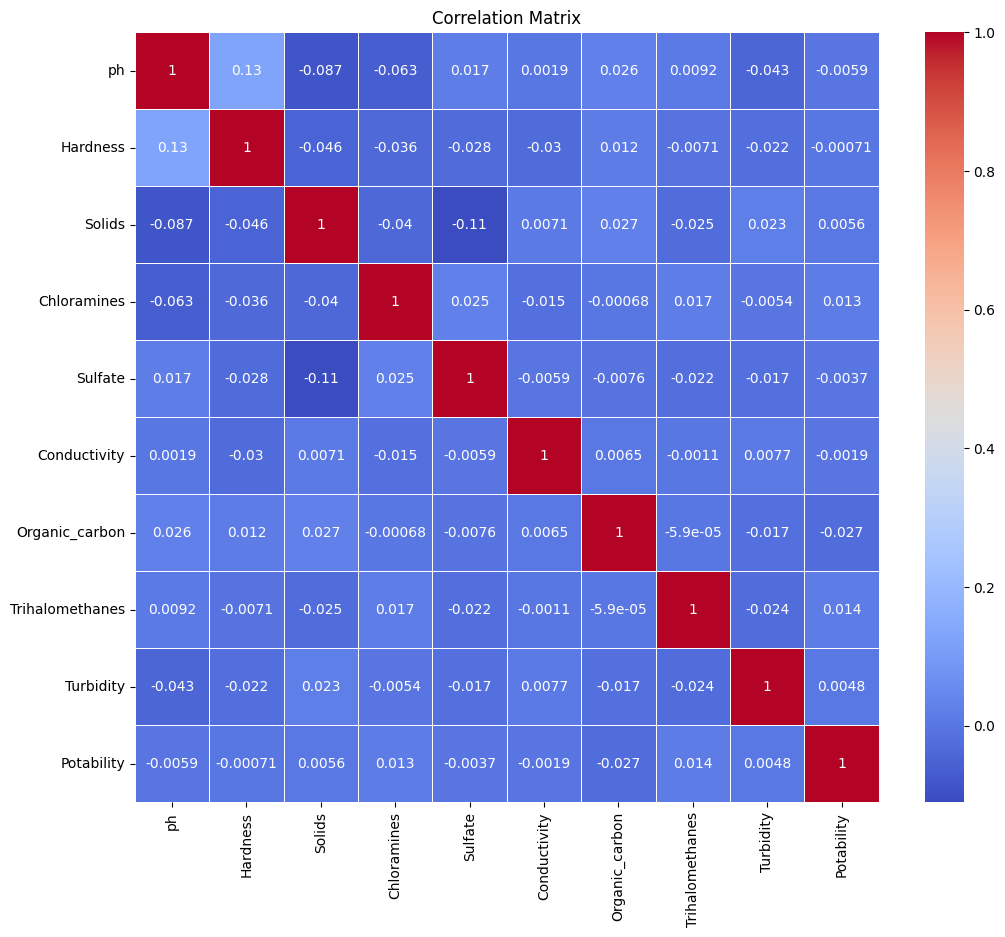

In [41]:
#plot correlation
corr_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

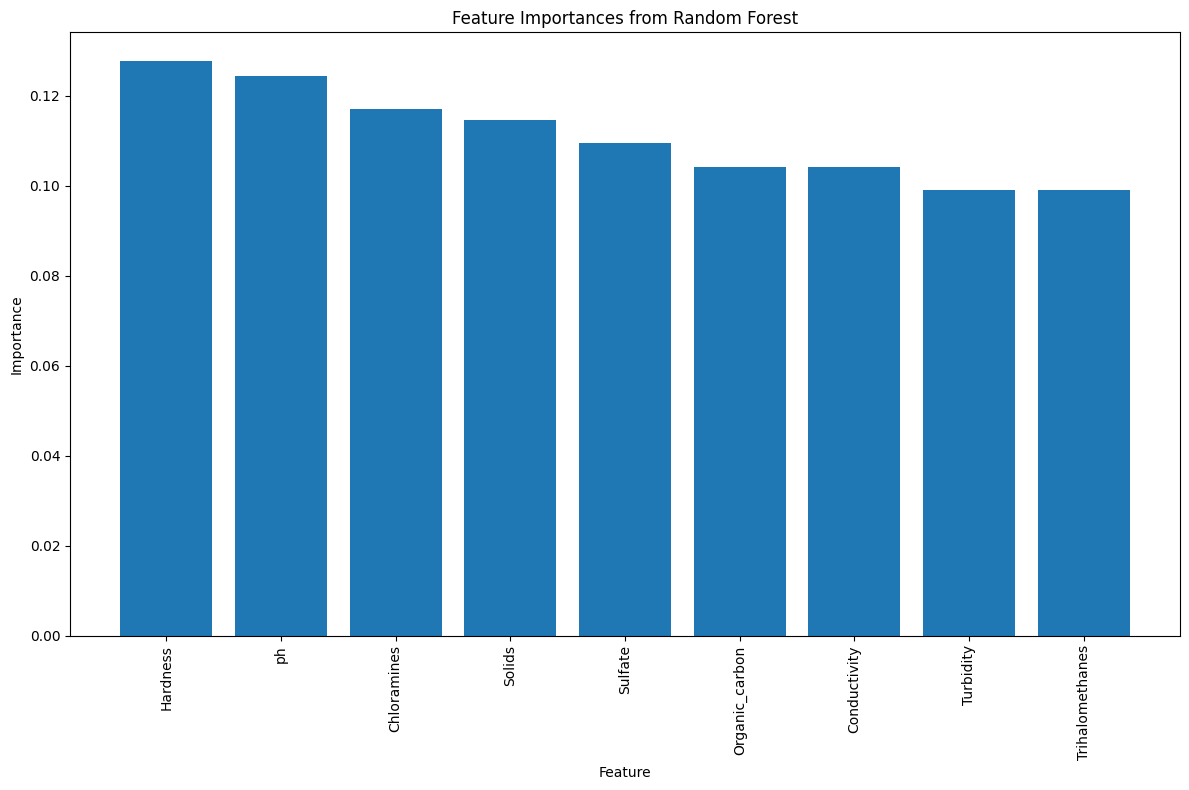

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train_resampled.columns

# show Feature Importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importances from Random Forest')
plt.bar(range(X_train_resampled.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_resampled.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

all features seem to be important. But we should try to delete at least 1 column to see the different.

In [61]:
# Drop the least important feature
least_important_feature = features[indices[-2]]
X_train_reduced = X_train_resampled.drop(least_important_feature, axis=1)
X_test_reduced = X_test.drop(least_important_feature, axis=1)

# Retrain the Random Forest model with reduced features
rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(X_train_reduced, y_train_resampled)
y_pred_reduced = rf_reduced.predict(X_test_reduced)

# Evaluate the model's performance
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy after dropping {least_important_feature}: {accuracy_reduced}")

# Compare with the previous accuracy
previous_accuracy = results['Random Forest']
print(f"Previous Accuracy: {previous_accuracy}")

Accuracy after dropping Turbidity: 0.6797752808988764
Previous Accuracy: 0.6423220973782772


We can see the accuracy increase significantly after we dropped Turbidity.

###Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_reduced, y_train_resampled)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
